# Proyecto #StartupReady: Calidad de vinos

<img src=./images/og-analisisexploratorio.png>

Esta notebook es parte de un Proyecto #StartupReady de la [Escuela de Data Science e Inteligencia Artificial de Platzi](https://platzi.com/datos).

Todos los detalles [aquí](https://platzi.com/blog/ejercicio-eda-wine).

## Conoce los datos - Vinho Verde

1. Lee esta información para tener contexto de los datos que se usarán:

Utilizaremos dos datasets enfocados en la calidad de vinos. Ambos se relacionan a las variantes de vino blanco y vino rojo del vino portugués "Vinho Verde".

<img src=./images/Large186.jpg>

La fuente de estos datasets son del Machine Learning Repository de UCI. Puedes conocer más de ellos [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality).

Input variables (based on physicochemical tests):
1. fixed acidity / acidez fija
La mayoría de los ácidos involucrados con el vino o fijos o no volátiles (no se evaporan fácilmente).

2. volatile acidity / acidez volátil
La cantidad de ácido acético en el vino, que en niveles demasiado altos puede provocar un sabor desagradable a vinagre.

3. citric acid / ácido cítrico
Encontrado en pequeñas cantidades el ácido cítrico puede agregar 'frescura' y sabor a los vinos.

4. residual sugar / azúcar residual
La cantidad de azúcar que queda después de que se detiene la fermentación. Es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.

5. chlorides / cloruros
La cantidad de sal en el vino.

6. free sulfur dioxide / dióxido de azufre libre
La forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.

7. total sulfur dioxide / dióxido de azufre total
Cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es mayormente indetectable en el vino, pero en concentraciones de SO2 libres superiores a 50 ppm, el SO2 se vuelve evidente en la nariz y el sabor del vino.

8. density / densidad
La densidad del agua es cercana a la del agua dependiendo del porcentaje de alcohol y azúcar contenido.

9. pH / pH
Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3 y 4 en la escala de pH

10. sulphates / sulfatos
Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (S02), que actúa como antimicrobiano y antioxidante

11. alcohol / alcohol
El porcentaje de contenido de alcohol del vino

Output variable (based on sensory data):

12. quality / calidad
Variable de salida o target (basada en datos sensoriales, puntuación entre 0 y 10). Indica qué tan bueno es el vino en este estándar de calidad.

## Importar librerías

1. Ejecuta la siguiente celda para importar librerías.

Estas son las librerías de Python esenciales para ejecutar tu EDA. Mientras desarrolles el proyecto puedes agregar las que veas conveninente. 

Puedes usar cualquiera que conozcas del lenguaje Python.

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# agrega librerías que necesites

## Carga de datos

1. Carga los datasets directo de sus URL como se muestran en la siguiente celda.

Nota: alternativamente podríamos cargar los datos con los archivos csv, pero con las URL los podemos tener de forma más directa desde la fuente.

In [255]:
url_wine_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_wine_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

2. Utiliza Pandas para crear tus DataFrames utilizando las dos variables que creaste para cargar los datos. 

Toma en cuenta que el delimiter de los archivos csv es `;`

In [256]:
red = pd.read_csv(url_wine_red, delimiter=';')
white = pd.read_csv(url_wine_white, delimiter=';')

3. Carga las primeras 5 filas de ambos DataFrames.

In [257]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [258]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### *Clases sugeridas*:

- [Series y DataFrames en Pandas](https://platzi.com/clases/2912-pandas-numpy/47984-series-y-dataframes-en-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Leer archivos CSV y JSON con Pandas](https://platzi.com/clases/2912-pandas-numpy/47985-leer-archivos-csv-y-json-con-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Combina ambos DataFrames

1. Incluye una variable llamada `category` a cada DataFrame que indiqué si el vino es rojo (red) o blanco (white). Esto servirá para distinguir el tipo de vino de cada fila/registro al unir los DataFrames.

In [259]:
red['category']='red'
white['category']='white'

2. Utiliza Pandas para unir ambos registros de los dos DataFrames.

In [260]:
total_wine = pd.concat([red, white], ignore_index=True)


3. Comprueba que el DataFrame este completo viendo sus primeras filas. Ve que la columna category esté con los datos correctos.

In [261]:
total_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### *Clases sugeridas*:

- [Agregar o eliminar datos con Pandas](https://platzi.com/clases/2912-pandas-numpy/47987-agregar-o-eliminar-datos-con-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Exploración inicial de los datos y validación

1. Consigue la cantidad de filas y columnas del DataFrame.

In [262]:
total_wine.shape

(6497, 13)

2. Conoce los tipos de datos de cada característica/variable y si tienen valores nulos.

In [263]:
total_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  category              6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


3. Cálcula las estadísticas descriptivas del dataset. Observa a detalle las estadísticas e identifica si existen diferencias altas entre cada percentil y en los percentilees extremos con valores máximos y mínimos de cada característica/variable.

In [264]:
total_wine.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


4. Crea una variable donde almacenarás los valores de la columna `quality`. Revisa sus estadísticas descriptivas principales.

In [265]:
quality = total_wine['quality']
quality

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

5. Cuenta los valores únicos de la variable `quality`. Para visualizar cómo se comporta e identificar si es una variable discreta o continua.

<Axes: xlabel='quality', ylabel='Count'>

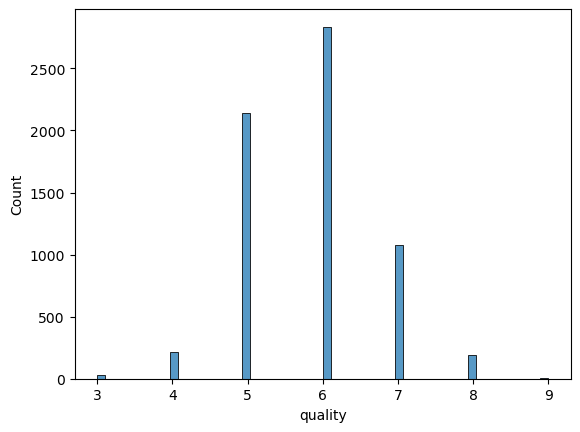

In [266]:
sns.histplot(quality)

6. Escribe tus observaciones de cada uno de los pasos anteriores de esta sección:

* Hay 6497 filas con 13 columnas, de estas hay '11 float', '1 texto' y '1 entero'
* Los percentiles no están muy alejados entre si; sin embargo, hay algunas columnas que tienen outliers grandes ('volatile acidity', 'citric acid' ,'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates')

### *Clases sugeridas*:

- [Shape y Reshape](https://platzi.com/clases/2912-pandas-numpy/47979-shape-y-reshape/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Funciones principales de Pandas](https://platzi.com/clases/2912-pandas-numpy/47990-funciones-principales-de-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Medidas de tendencia central](https://platzi.com/clases/2353-estadistica-descriptiva/38396-medidas-de-tendencia-central/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Medidas de tendencia central en Python](https://platzi.com/clases/2353-estadistica-descriptiva/38398-medidas-de-tendencia-central-en-python/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Categorización de la variable target

En la sección anterior pudiste observar que la variable `quality` es categórica en naturaleza. Crear categorías de calidad nos ayudará a entender mejor cómo se comporta la calidad en los vinos.

En esta sección entenderás mejor la razón de esto y lo ejecutarás.

1. Crea una gráfica tipo countplot de la variable `quality` para ver la cantidad de cada valor de calidad.

<Axes: xlabel='quality', ylabel='count'>

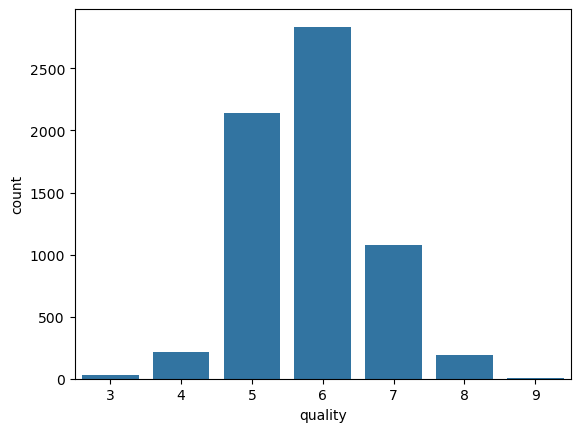

In [267]:
sns.countplot(data= total_wine, x= quality )

Con la visualización anterior es mucho más sencillo de observar cómo se categorizan los valores de calidad en 3 grupos principales (baja, media y alta). 

2. Completa la siguiente función lambda con las condiciones necesarias para agregar una columna al DataFrame donde se indique la categoría de calidad: 'Poor', 'Medium', 'High'. Para ello deberás definir el criterio de rango de valores de cada categoría de acuerdo a lo que observaste en la gráfica anterior.

In [268]:
total_wine['quality_category'] = total_wine['quality'].apply(lambda x: "Poor" if x < 5 else ("Medium " if x >=5 and x <= 7 else "High"))
total_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_category
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,Medium
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,Medium
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,Medium
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,Medium
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,Medium


2.1 Redefine el tipo de variable de la nueva columna como tipo 'category'.

In [269]:
total_wine.quality_category = total_wine['quality_category'].astype('category')
total_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  category              6497 non-null   object  
 13  quality_category      6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

3. Crea una gráfica para visualizar el conteo de datos en cada una de las categorías de calidad del vino.

<Axes: xlabel='count', ylabel='quality_category'>

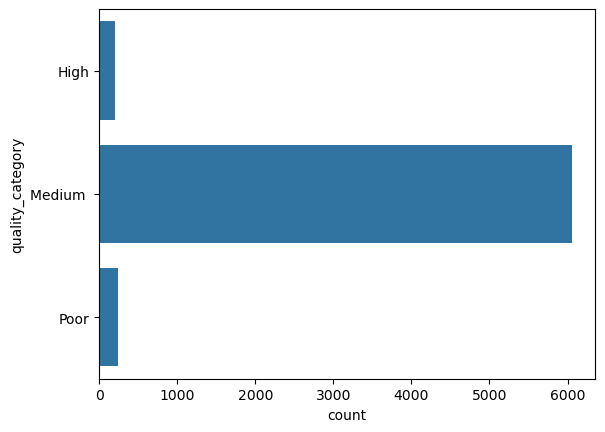

In [270]:
sns.countplot(total_wine['quality_category'])

4. Escribe tus observaciones de cada uno de los pasos anteriores de esta sección:

* Se puede observar que los datos en la calidad del vino se concentra en **"Medium"**. 

Hay que ver sí hay outliers en nuestros Datos, para así tener un mejor resultado.

### *Clases sugeridas*:

Gráficas

- [Set (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47947-set/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Categóricos (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Apply, lambdas, conversión de datos

- [Funciones anónimas: lambdas](https://platzi.com/clases/2255-python-intermedio/36465-funciones-anonimas-lambda/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Apply (Pandas)](https://platzi.com/clases/2912-pandas-numpy/47996-apply/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Tipos de datos (NumPy y Pandas)](https://platzi.com/clases/2912-pandas-numpy/47976-tipos-de-datos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Manejo de outliers

En una sección anterior tuviste una pista de qué existen outliers en el dataset. 

1. Utiliza el método que veas más conveniente para detectar outliers en tu dataset. Por ejemplo, boxplots, método IQR, etc.

/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped

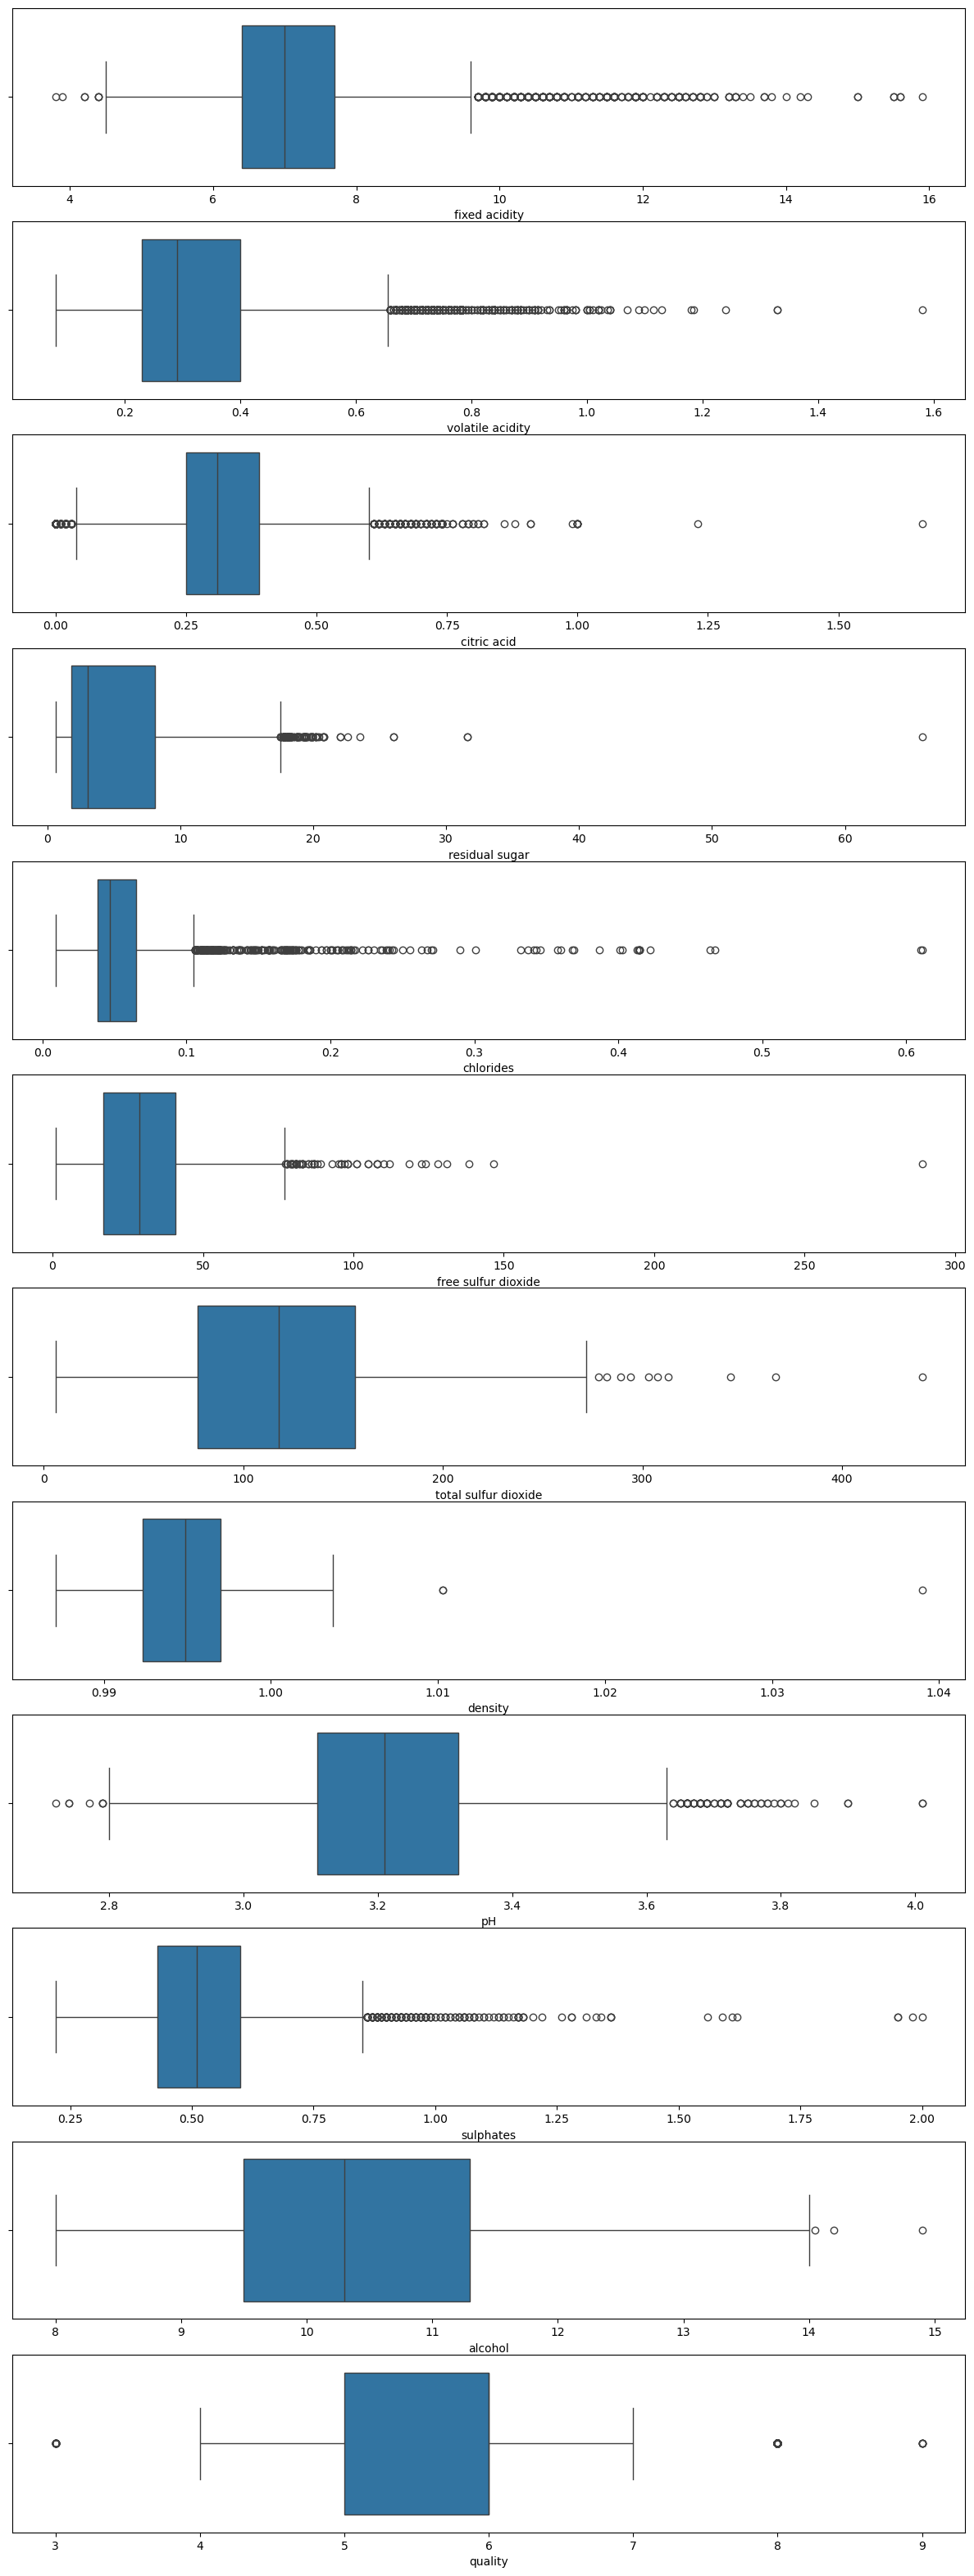

In [271]:
# crea un boxplot para ver los outliers
cols = total_wine.select_dtypes(np.number).columns

#cuantas columnas hay
number = len(cols)


fig, ax = plt.subplots(number,figsize = (15,40))


for i, i_col in enumerate(cols):
    sns.boxplot(
        ax = ax[i],
        data = total_wine,
        x = i_col
    )
    
#plt.tight_layout()
plt.show();
# sns.boxplot(data=total_wine, x='quality', y='alcohol')


2. Responde la siguiente pregunta:

a) ¿Ves necesario eliminar estos outliers?

b) ¿Por qué?

a) No

b) Porque en este dataset podriamos usarlos para que nos de más información del vino. Que carateristicas hacen al vino de mayor o menor calidad.

3. Elimina los outliers de ser necesario en la siguiente celda.

In [272]:
# Eliminate outliers from all columns
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

# Columns to remove outliers from
columns = ['quality', 'alcohol', 'sulphates', 'citric acid', 'residual sugar', 'pH', 'density', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'fixed acidity']

# Remove outliers for each column
for column in columns:
    total_wine = remove_outliers(total_wine, column)


### *Clases sugeridas*:

Estadística descriptiva
- [Medidas de dispersión](https://platzi.com/clases/2353-estadistica-descriptiva/38399-medidas-de-dispersion/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Desviación estándar](https://platzi.com/clases/2353-estadistica-descriptiva/38400-desviacion-estandar/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Medidas de dispersión en Python](https://platzi.com/clases/2353-estadistica-descriptiva/38401-medidas-de-dispersion-en-python/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Gráficas boxplots
- [Crear otro tipo de gráficas (Boxplot en Matplotlib)](https://platzi.com/clases/2913-matplotlib-seaborn/47945-crear-otro-tipo-de-graficas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Categóricos (Boxplot en Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Análisis de correlación entre variables

Ya que conociste el comportamiento esencial de las características y la variable `quality` es momento de conocer cómo se relacionan entre sí para descubrir si alguna(s) pueden afectar a esta calidad.

1. Crea una matriz de correlación de las variables numéricas del dataset.

In [273]:
# total_wine['quality_category'] = total_wine['quality_category'].str.strip()
# select only the numeric columns
numeric_columns = total_wine.select_dtypes(include=[np.number]).columns

#make a coorrelation matrix
wine_corr= total_wine[numeric_columns].corr()

2. Crea una gráfica tipo heatmap para observar mejor las correlaciones entre variables. 

<Axes: >

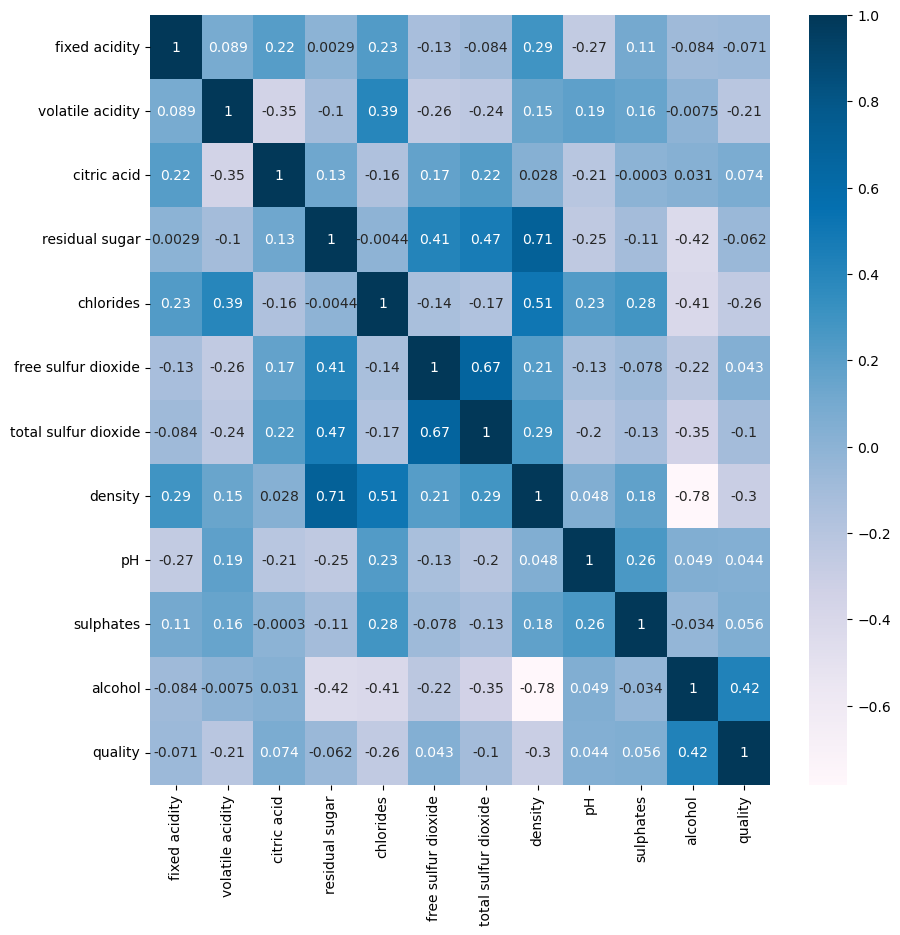

In [274]:
plt.figure(figsize =(10,10))
sns.heatmap(wine_corr, annot= True, cmap='PuBu')

3. Muestra una tabla con los valores de correlación de cada variable con la variable `quality`.

In [275]:
# Exclude the 'category' column from the correlation calculation
numeric_columns = total_wine.select_dtypes(include=[np.number]).columns
total_wine_sort = total_wine[numeric_columns].corr()[['quality']].sort_values(by='quality', ascending=False)
total_wine_sort

,quality
quality,1.000000
alcohol,0.424504
citric acid,0.074047
sulphates,0.056126
pH,0.043982
free sulfur dioxide,0.042704
residual sugar,-0.062008
fixed acidity,-0.070643
total sulfur dioxide,-0.102830
volatile acidity,-0.213944


In [276]:
# export like a file .txt
total_wine_sort.to_csv('correlation.txt', sep='\t')


4. Responde las siguientes preguntas:

a) ¿Existen variables que tengan correlación positiva con la variable `quality`? ¿Cuáles son?
R/ **pH, sulphates, free sulfur dioxide, citric acid, alcohol.**

b) ¿Existen variables que tengan correlación negativa con la variable `quality`? ¿Cuáles son?
R/ **residual sugar,total sulfur dioxide, fixed acidity, chlorides, volatile acidity, density.**

Las variables que más correlación tienen con la calidad son:

a) Positivamente:
- **Alcohol, citric acid.**

b) Negativamente:
- **Density, volatile accidity, chlorides**.

5. Crea las gráficas que consideres para ver la correlación que exista entre las variables que encontraste que tienen mayor correlación con la variable `quality`.

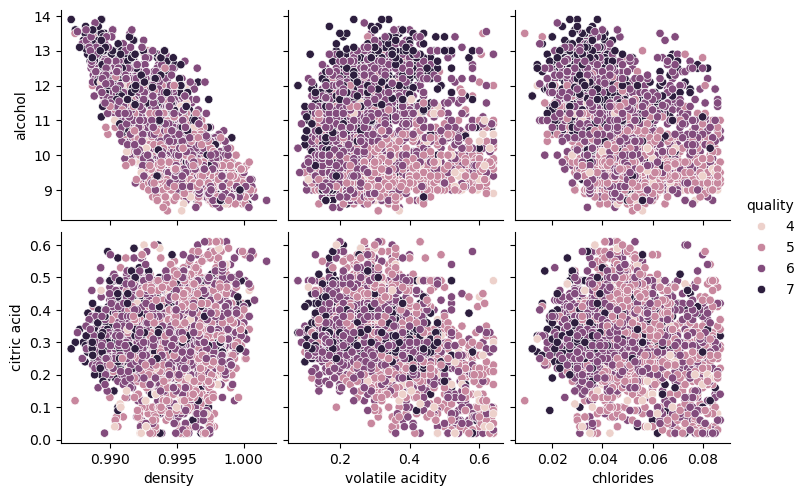

In [277]:
sns.pairplot(total_wine,
x_vars=["density", "volatile acidity", "chlorides"],
y_vars=["alcohol", "citric acid"], 
hue= 'quality', kind = 'scatter');

6. Responde las preguntas: 

a) ¿Existen variables correlacionadas con la calidad que estén correlacionadas fuertemente entre sí?

b) ¿Esta información para que nos serviría?

a) Si, Alcohol y density

b) Muestra que entre más dencidad tenga el vino, tendrá menos cantidad de alcohol y por ende, será peor

7. Crea gráficas de barras y de violín para ver a detalle cómo las variables que tienen correlación más fuerte con la variable `quality`, afectan a dicha variable.

- En el eje x deberán aparecer las categorías de calidad: Poor, Medium High.

- En el eje y deberá aparecer la variable correspondiente.

- Toma en cuenta los valores máximo y mínimo de cada variable para marcar los límites en el eje y.

Al finalizar obtendrás gráficas como estas:

<img src=./images/density.png>
<img src=./images/density_violin.png>


In [278]:
total_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_category
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,Medium
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,Medium
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,Medium
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,Medium
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4,red,Poor


### Negativos

/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/hom

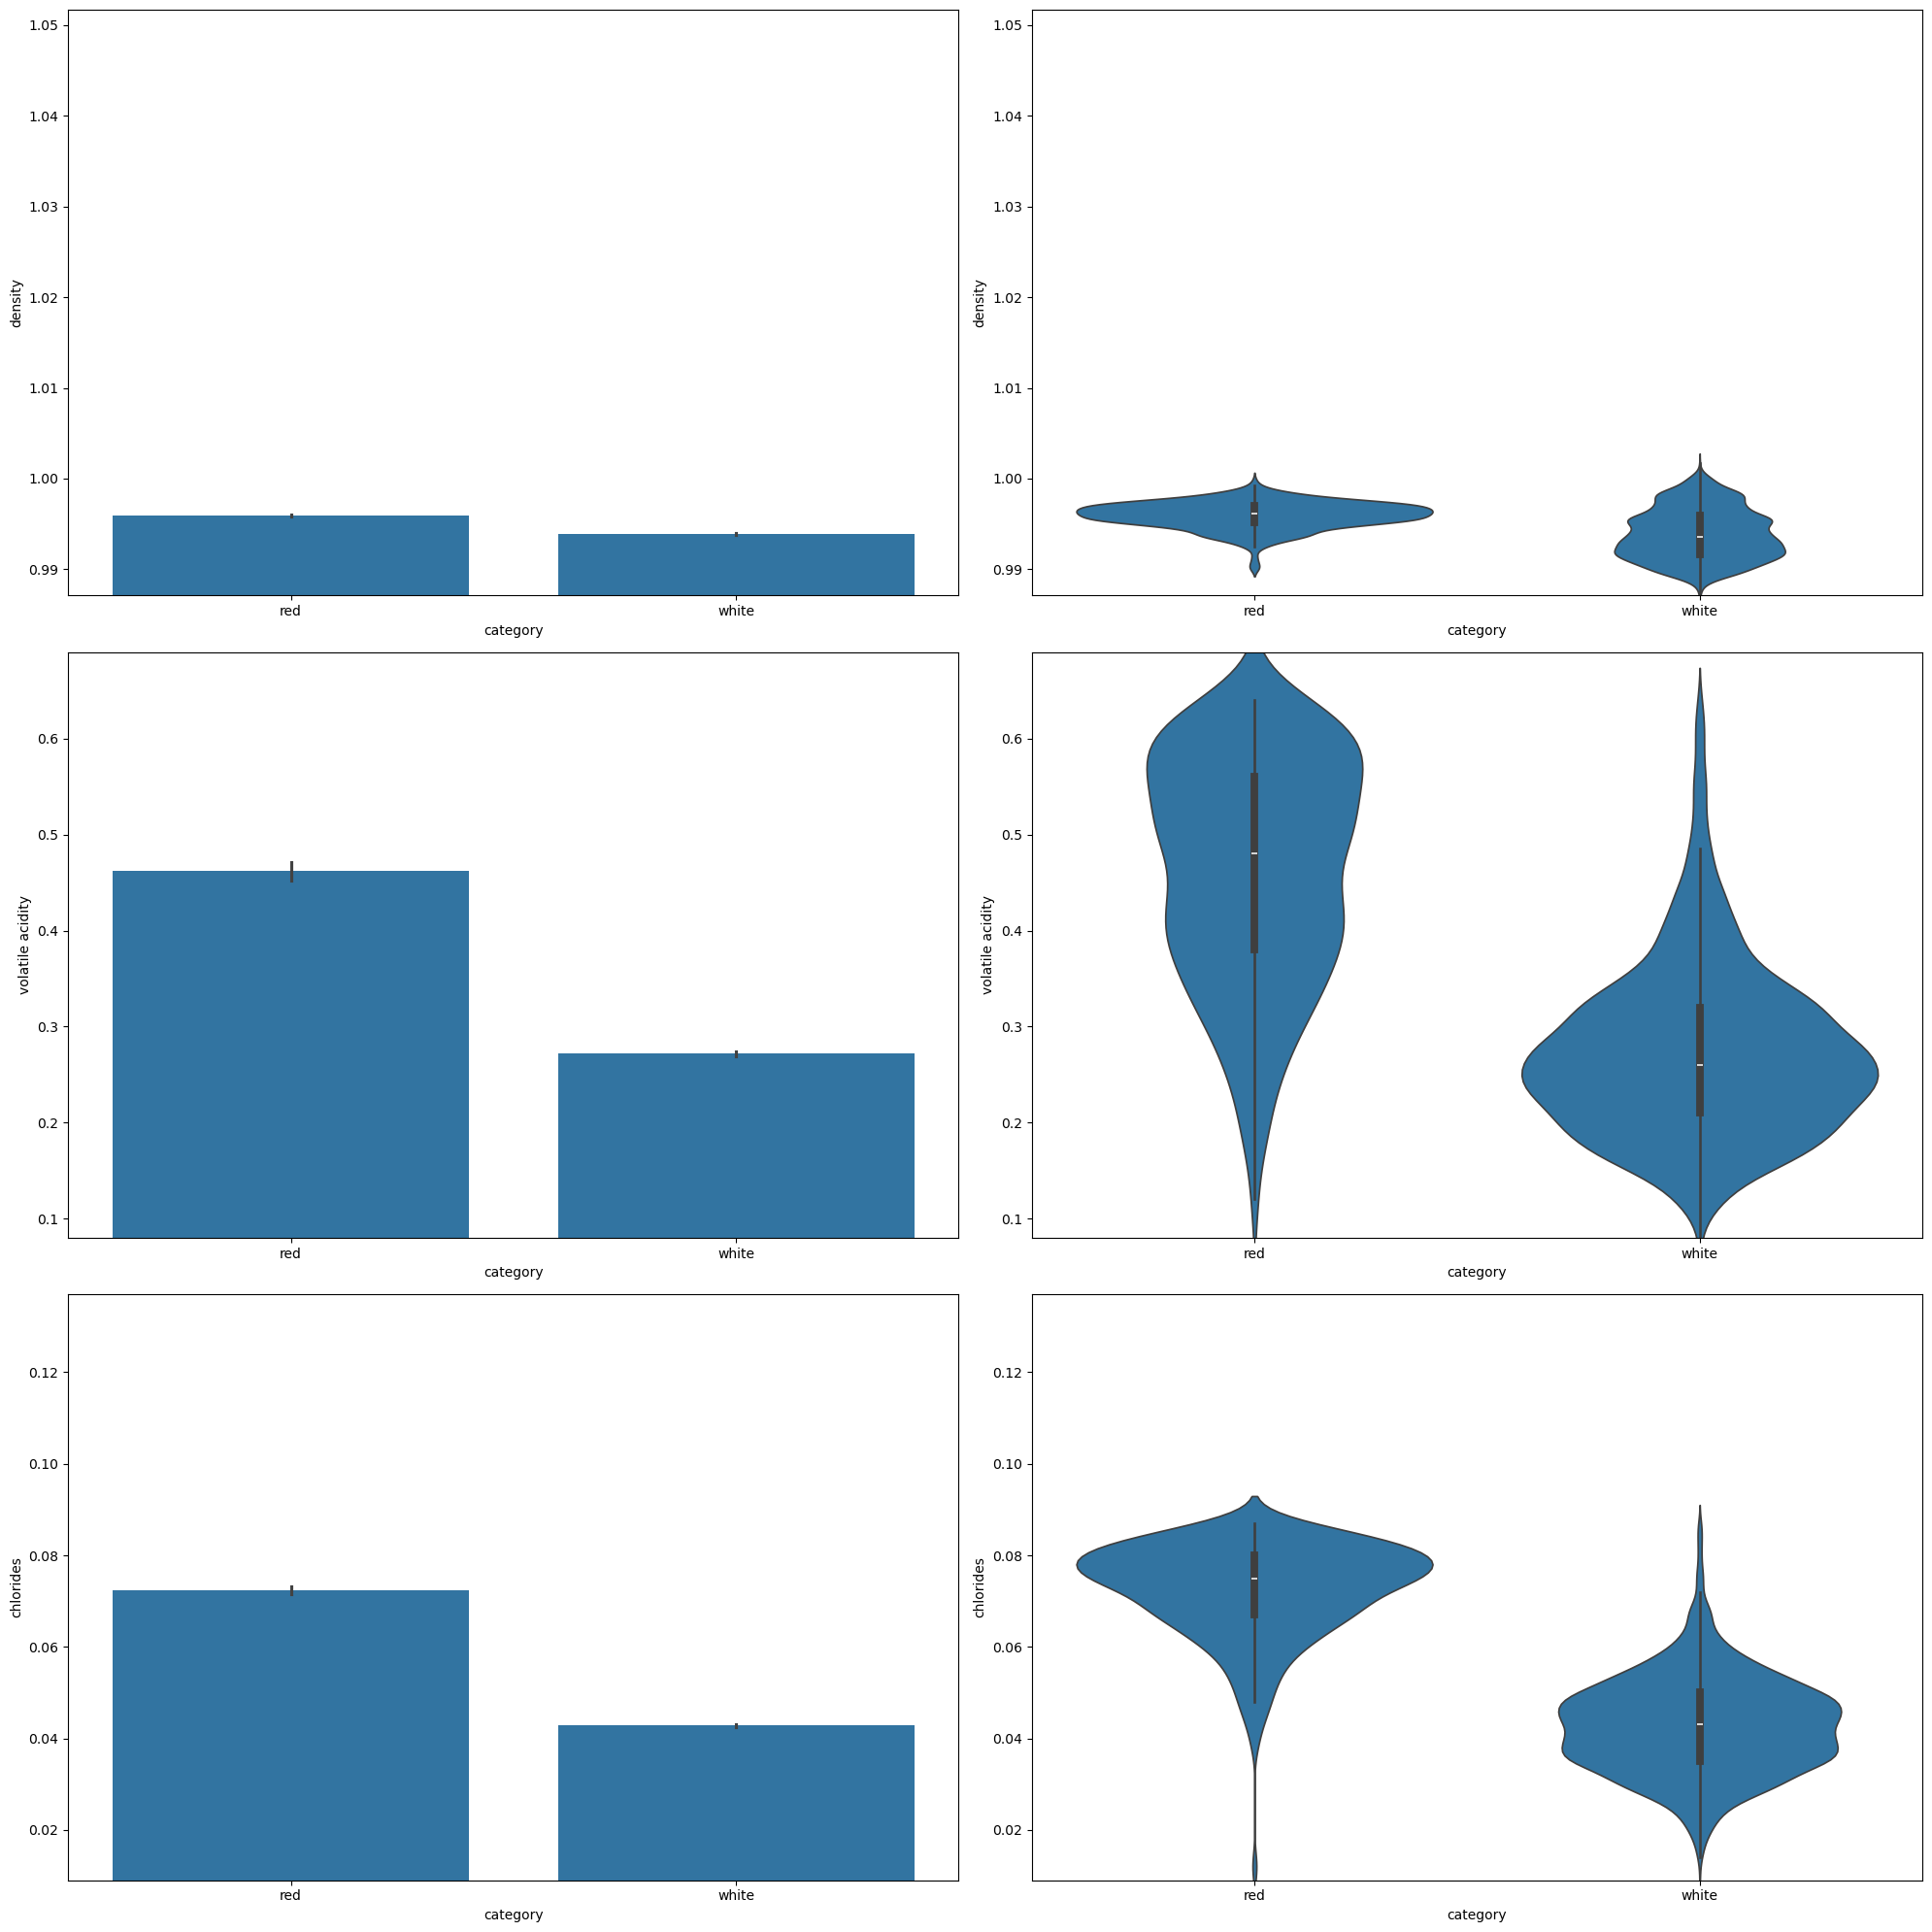

In [279]:
variables = ['density', 'volatile acidity', 'chlorides']

fig, ax = plt.subplots(3, 2, figsize=(20, 20));

for i, variable in enumerate(variables):
    sns.barplot(data=total_wine, x='category', y=variable, ax=ax[i, 0])
    ax[i, 0].set_ylim(total_wine[variable].min(), total_wine[variable].max() + 0.05)
    
    sns.violinplot(data=total_wine, x='category', y=variable, ax=ax[i, 1])
    ax[i, 1].set_ylim(total_wine[variable].min(), total_wine[variable].max() + 0.05)

fig.tight_layout();
plt.show();

## Positivos

/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/hom

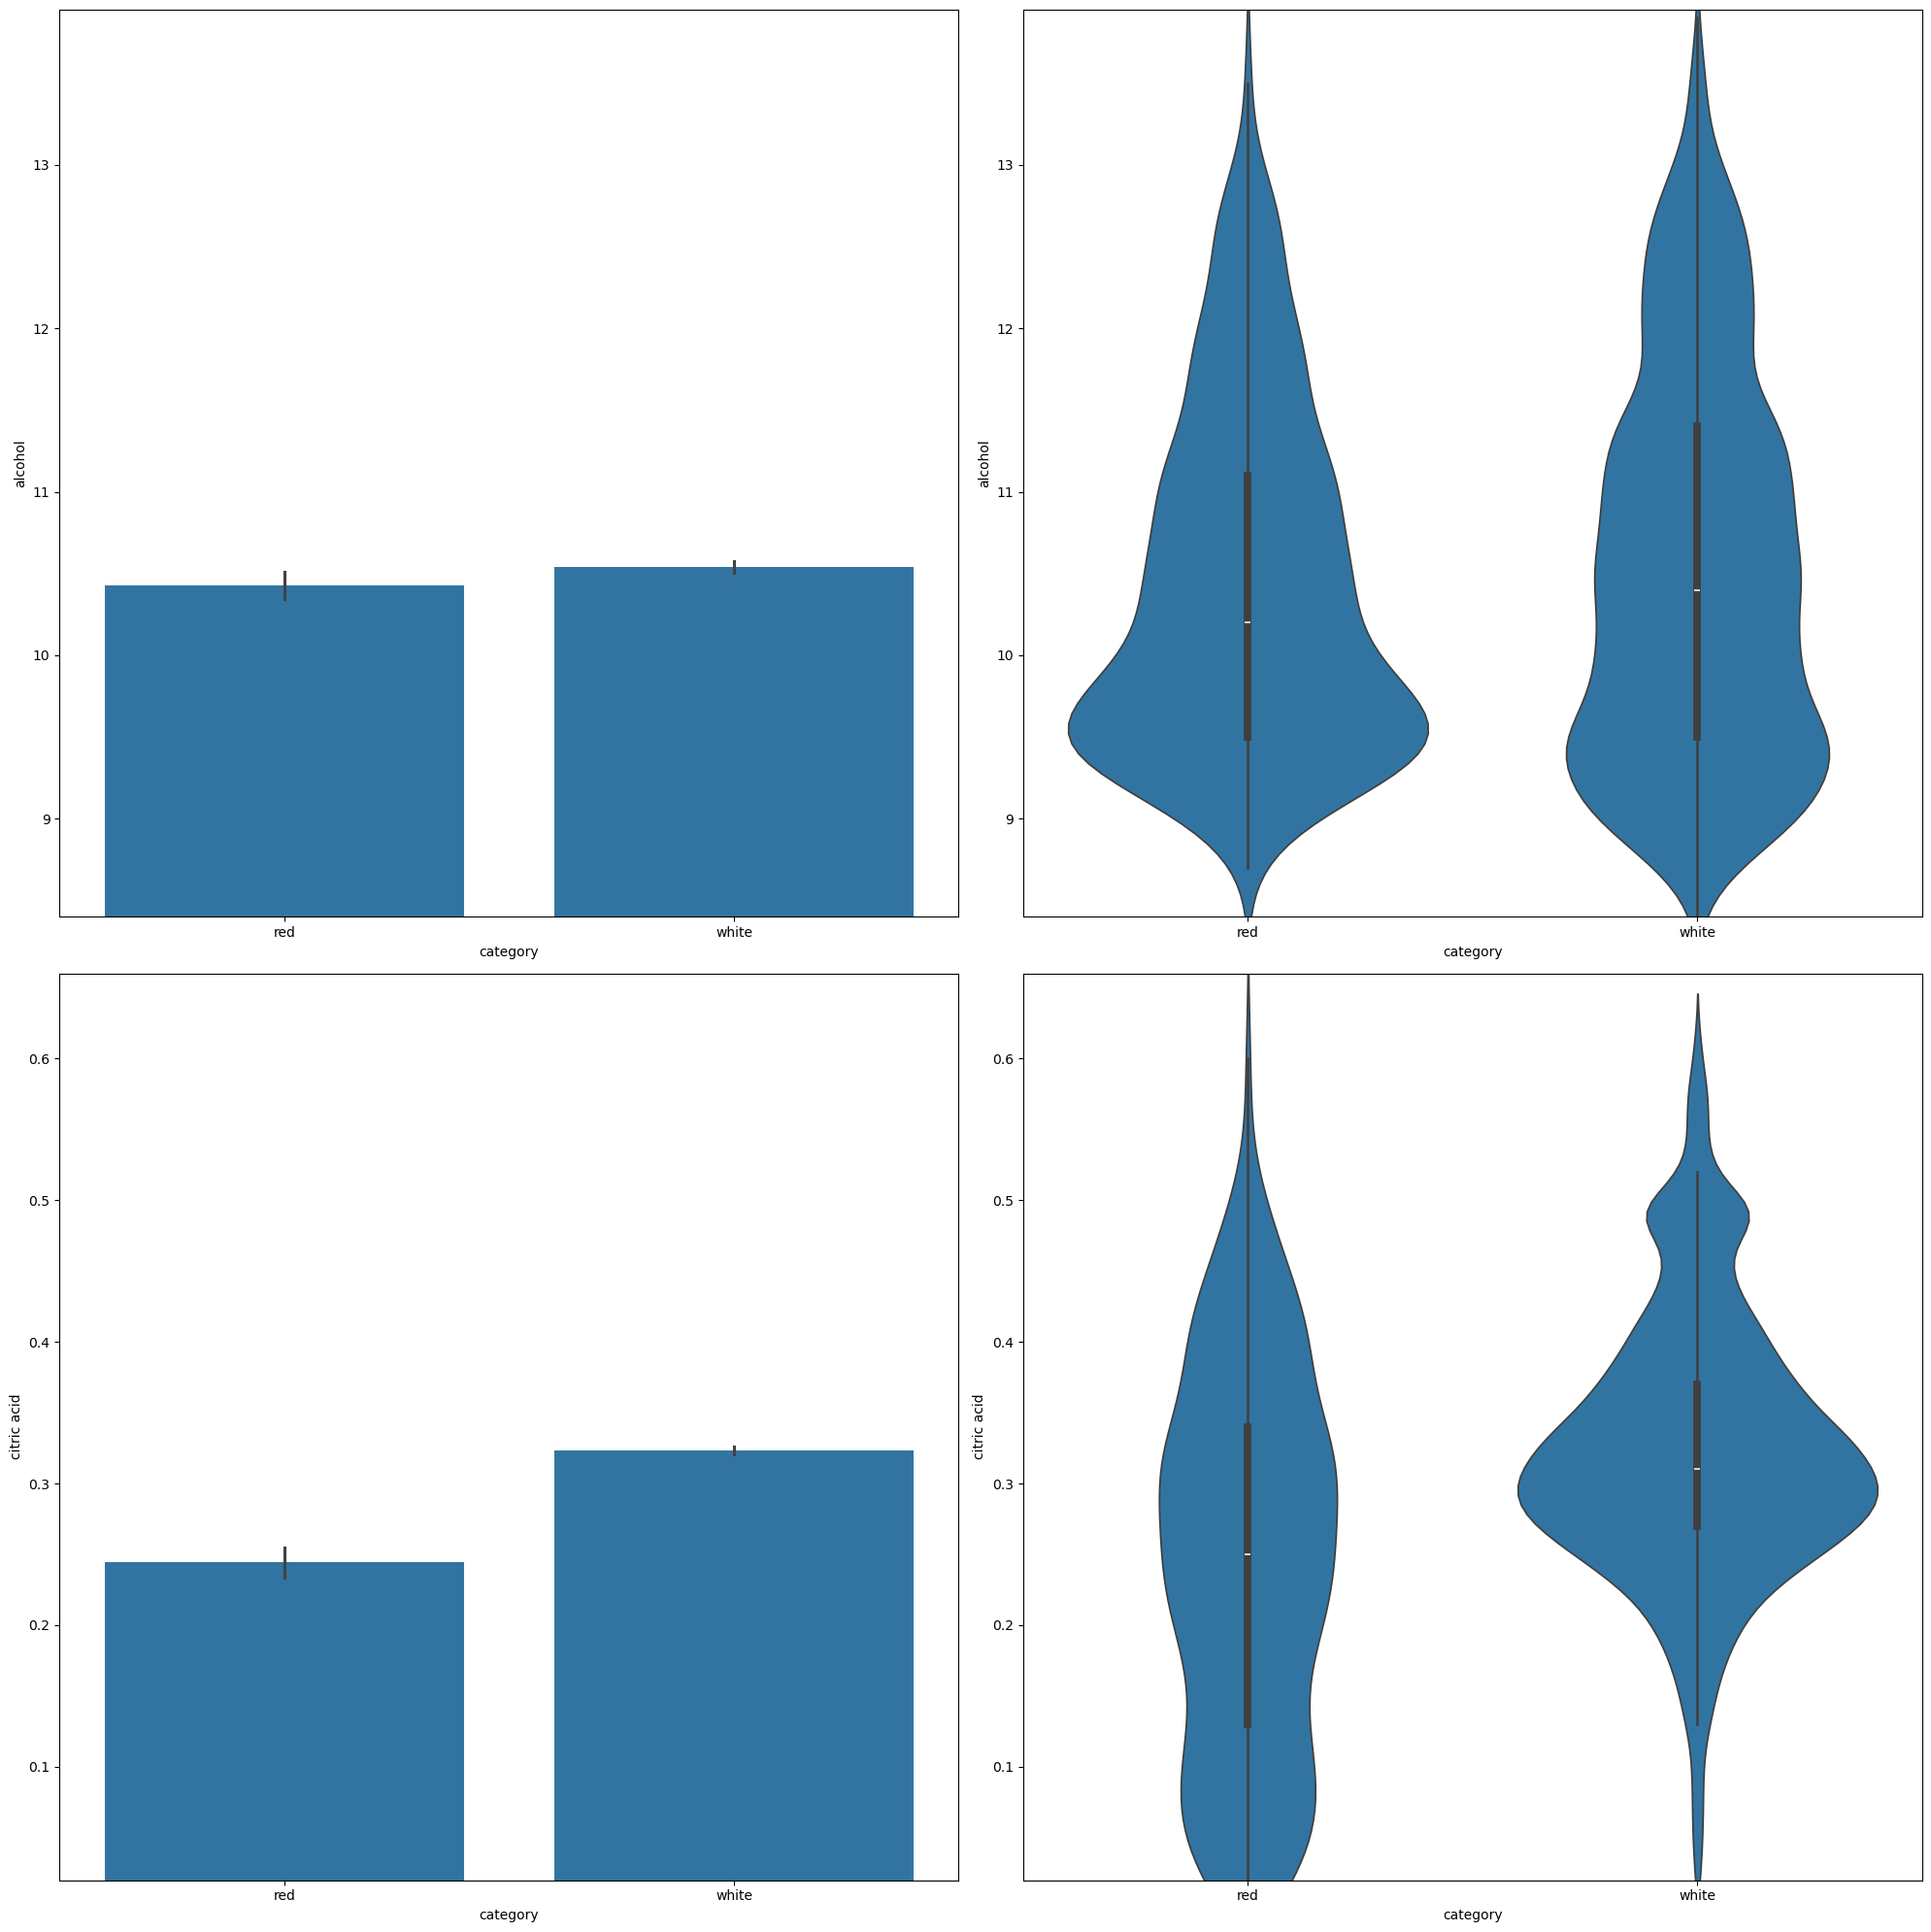

In [282]:
variables = ['alcohol', 'citric acid']

fig, ax = plt.subplots(2, 2, figsize=(20, 20));

for i, variable in enumerate(variables):
    sns.barplot(data=total_wine, x='category', y=variable, ax=ax[i, 0])
    ax[i, 0].set_ylim(total_wine[variable].min(), total_wine[variable].max() + 0.05)
    
    sns.violinplot(data=total_wine, x='category', y=variable, ax=ax[i, 1])
    ax[i, 1].set_ylim(total_wine[variable].min(), total_wine[variable].max() + 0.05)

fig.tight_layout();
plt.show();

8. Responde las siguientes preguntas como conclusiones de este EDA:

a) ¿Cuáles son las variables que podrían afectarían a la calidad del vino?

b) ¿Es necesario aumentar o disminuir la cantidad de dichas variables para aumentar la calidad?

c) ¿Cuál es la variable que más podría afectar a la calidad del vino?

* A) Las variables que podrían afectar en la calidad a mayor medida son: **Alcohol** y **Volatile Acidity**.
* B) En este caso la causalidad si genera correlación. Si se disminuye la cantidad de **Volatile Acidity**, podría aumentar la calidad del vino, al igual que se prdría aumentar la cantidad de **Alcohol**.
* C) La variable que más afecta a el vino es **Volatile Acidity**, entre mayor cantidad de esta tenga, peor será su calidad.

### *Clases sugeridas*:

Estadística descriptiva y EDA
- [Correlaciones](https://platzi.com/clases/2353-estadistica-descriptiva/38409-correlaciones/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Matriz de covarianza](https://platzi.com/clases/2353-estadistica-descriptiva/38410-matriz-de-covarianza/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Correlación](https://platzi.com/clases/2178-analisis-exploratorio-datos/34151-correlacion/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Gráficas
- [Relation (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47951-relation/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Heatmap (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47953-heatmap/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Jointplot y Pairplot (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47952-jointplot-y-pairplot/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Bar Plot (Matplotlib)](https://platzi.com/clases/2913-matplotlib-seaborn/47944-bar-plot/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Categóricos (Violin plot en Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Siguientes pasos - #StartupReady 🚀

---

¡Muchas felicidades! Has creado tu primer proyecto de análisis exploratorio de datos.

Es importante que recuerdes que dentro del análisis exploratorio de datos hay múltiples caminos y herramientas de acuerdo a lo que quieras lograr. Podríamos ir más allá en la manipulación y análisis de datos. Incluso podríamos utilizar machine learning para validar nuestra hipótesis.

En este momento ya tienes **el primer proyecto para tu portafolio profesional**. Para seguir avanzando en tu carrera te recomendamos el [Curso para Crear tus Proyectos de Ciencia de Datos](https://platzi.com/cursos/proyectos-data-science/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda) y el [Curso para Conseguir Trabajo en Tecnología](https://platzi.com/cursos/conseguir-trabajo-tech/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda) y tendrás todo para unirte a una startup como Data Analyst o Data Scientist. #StartupReady 🚀

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=29f70b0d-c1f2-4f9d-850b-57af65306dc7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>